<a href="https://colab.research.google.com/github/buterajacques1/Credit-Card-Fraud-Detection-Predictive-Models-/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [65]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv1D, Dropout, MaxPool1D, BatchNormalization
from IPython.display import SVG
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import model_to_dot, plot_model
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.regularizers import l1, l2
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.metrics import confusion_matrix, classification_report

In [66]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/credit_data.csv')

In [67]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [68]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [69]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [70]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [71]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [72]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [73]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [74]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [75]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [76]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [77]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [78]:
df = pd.concat([legit_sample, fraud], axis=0)

In [79]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
41198,40582.0,-6.850892,1.812320,-4.203810,-0.572152,-5.461077,0.341589,1.190040,2.815484,-0.670530,...,-0.741159,-1.553949,-0.189864,0.110449,0.244393,0.567237,0.814556,-0.799392,559.99,0
247594,153628.0,-0.587623,-0.386694,0.788165,-3.174060,1.550750,4.649350,-1.292079,0.384246,0.336769,...,0.871904,0.436091,-0.079006,0.714030,-0.243233,-0.289928,0.320422,-0.002650,1.00,0
79463,58034.0,0.846824,-1.513787,-0.939680,-0.371153,1.027375,3.949362,-0.968123,0.891444,-0.613343,...,-0.137219,-0.493944,-0.318772,0.997743,0.590500,-0.235124,0.031380,0.073027,270.00,0
180613,124618.0,-0.230220,-0.059314,-0.013675,-1.842287,-0.477066,0.295980,-1.494384,-2.427844,-0.988685,...,-0.958366,0.915897,-0.272804,0.571274,0.848387,-0.143556,0.064552,0.282831,99.00,0
251154,155245.0,2.375704,-1.173997,-1.832621,-2.025283,-0.194519,-0.033433,-0.817035,-0.209673,-1.966797,...,0.063348,0.663867,-0.049479,-0.248527,0.259184,0.076113,-0.015521,-0.071651,15.00,0


In [80]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [81]:
df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [82]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93814.825203,-0.064375,-0.010311,-0.045297,-0.144065,0.004079,0.050253,-0.002695,0.012791,0.001573,...,0.012920,-0.022120,-0.008344,-0.014186,-0.012885,0.026370,0.014462,0.001206,0.004357,95.972967
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Finding Correlation

In [83]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for Credit Card Fraud Dataset', fontsize=15)
    plt.show()

<ipython-input-83-6b92619868ef>:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.



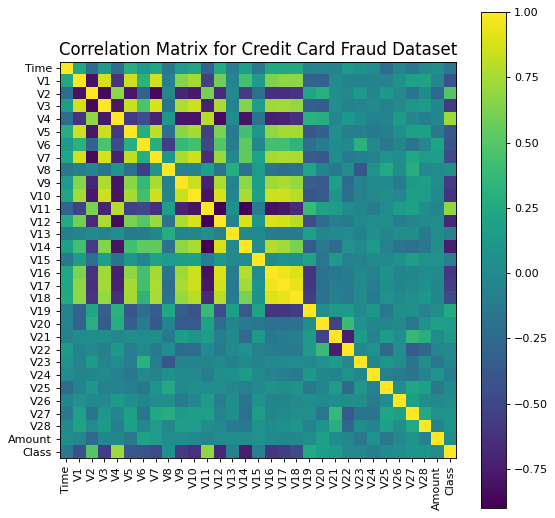

In [84]:

plotCorrelationMatrix(df, 8)


Scatter and Density Plot

In [85]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

<ipython-input-85-d6f0f127ac9b>:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.



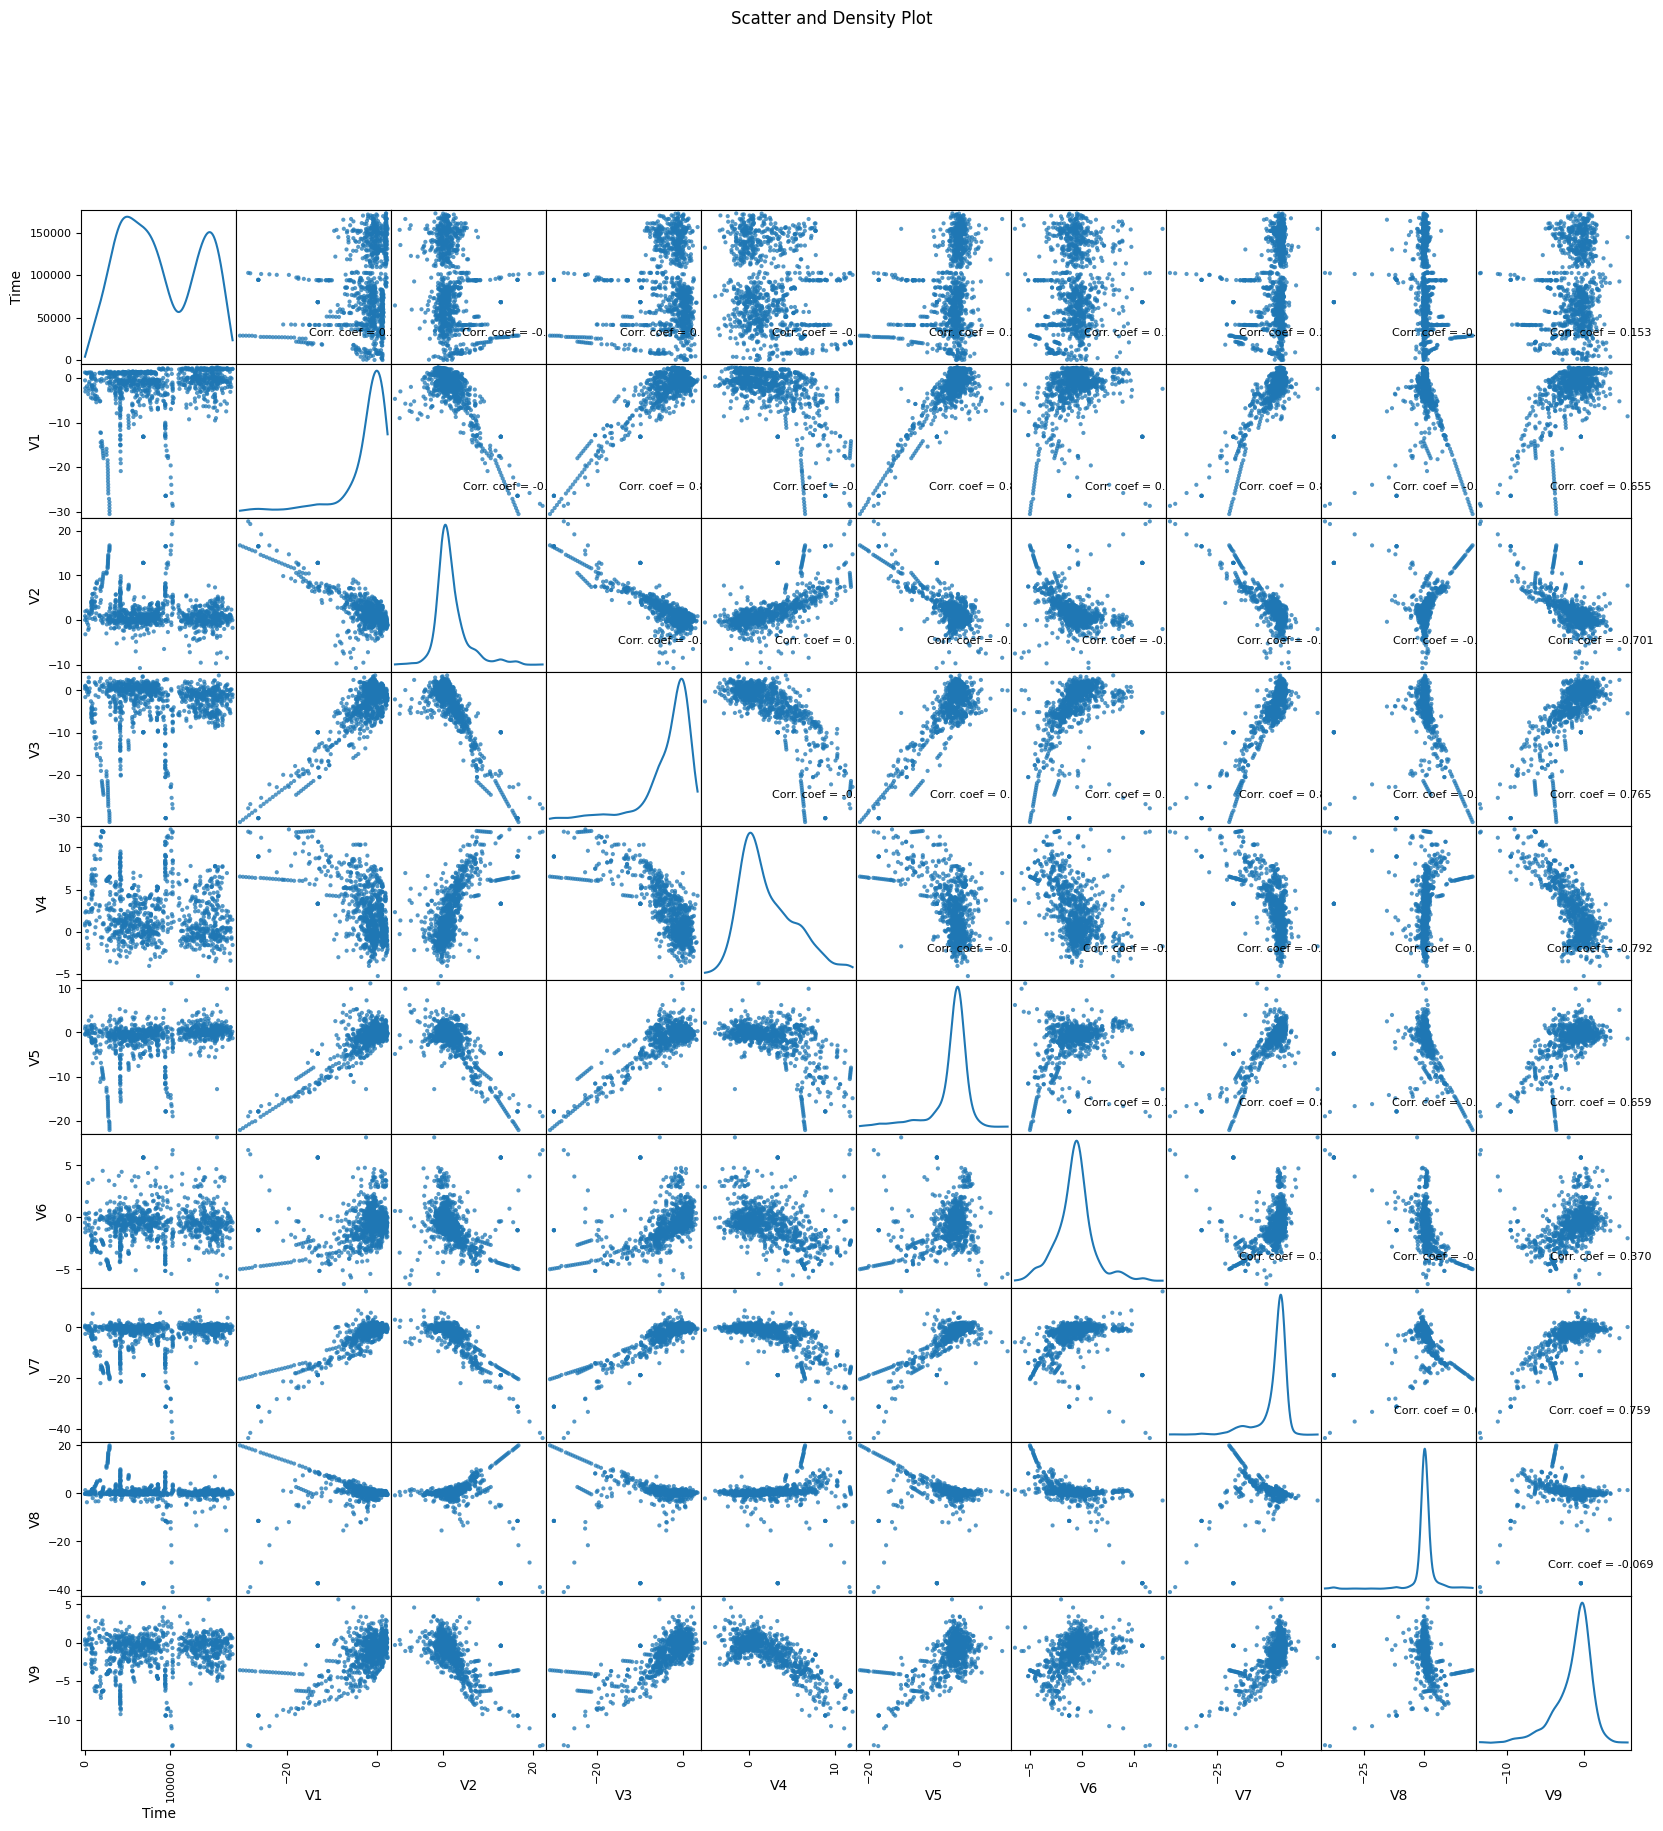

In [86]:
plotScatterMatrix(df, 20, 8)

SECTION 2: Data Preprocessing

In [87]:
# Define features x and y
x = df.drop(columns='Class', axis=1)
y = df['Class']


In [88]:
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
41198    40582.0 -6.850892  1.812320 -4.203810 -0.572152 -5.461077  0.341589   
247594  153628.0 -0.587623 -0.386694  0.788165 -3.174060  1.550750  4.649350   
79463    58034.0  0.846824 -1.513787 -0.939680 -0.371153  1.027375  3.949362   
180613  124618.0 -0.230220 -0.059314 -0.013675 -1.842287 -0.477066  0.295980   
251154  155245.0  2.375704 -1.173997 -1.832621 -2.025283 -0.194519 -0.033433   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [89]:
print(y)

41198     0
247594    0
79463     0
180613    0
251154    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [90]:
print(x.shape, y.shape)

(984, 30) (984,)


Split the data into Training data & Testing Data

In [93]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [95]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(787, 30) (787,) (197, 30) (197,)


Train Model without Optimization

In [96]:
epochs = 50
model = Sequential()
# Add convolution 2D
model.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64,kernel_size=2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [97]:
# Compile the model without any optimization technique
model.compile(loss=categorical_crossentropy,
              metrics=['accuracy'])
model.save('saved_models/model1.pkl')

In [ ]:
model.summary()

In [99]:
# Train the model
history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning:

In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.



25/25 [==============================] - 2s 23ms/step - loss: 0.0000e+00 - accuracy: 0.6874 - val_loss: 0.0000e+00 - val_accuracy: 0.8020
Epoch 2/50
 1/25 [>.............................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.5625

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning:

In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.



25/25 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.7014 - val_loss: 0.0000e+00 - val_accuracy: 0.8528
Epoch 3/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 0.7116 - val_loss: 0.0000e+00 - val_accuracy: 0.8680
Epoch 4/50
25/25 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 0.7103 - val_loss: 0.0000e+00 - val_accuracy: 0.8731
Epoch 5/50
25/25 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 0.7179 - val_loss: 0.0000e+00 - val_accuracy: 0.8528
Epoch 6/50
25/25 [==============================] - 0s 15ms/step - loss: 0.0000e+00 - accuracy: 0.7103 - val_loss: 0.0000e+00 - val_accuracy: 0.8274
Epoch 7/50
25/25 [==============================] - 1s 22ms/step - loss: 0.0000e+00 - accuracy: 0.7039 - val_loss: 0.0000e+00 - val_accuracy: 0.7868
Epoch 8/50
25/25 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - accuracy: 0.7001 - val_loss: 0.

In [119]:
# Print the final accuracy
_, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


7/7 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.6041
Training Accuracy: 60.99%
Test Accuracy: 60.41%


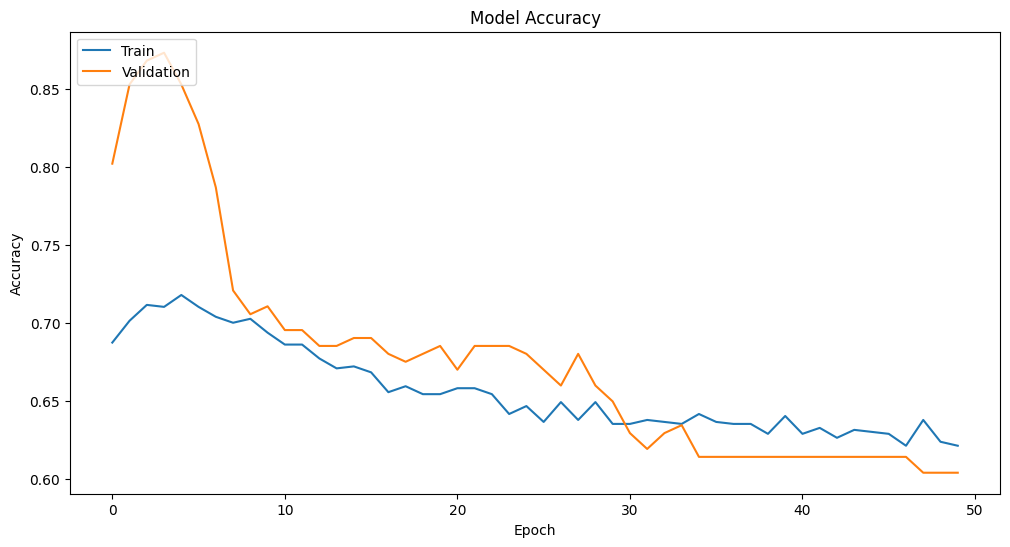

In [100]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')


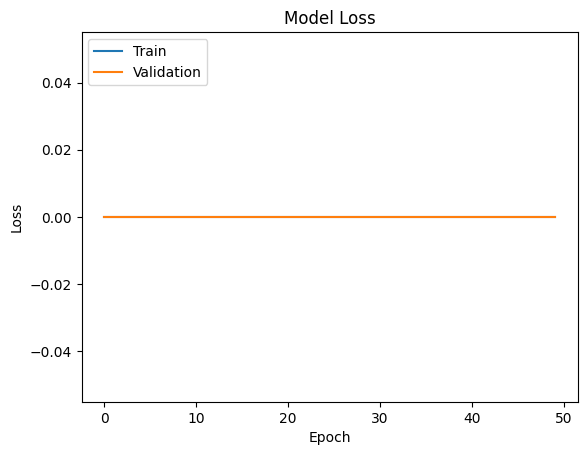

In [101]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

Model Training with Optimization Techniques

Adam Optimization

In [102]:
model2 = Sequential()
# Add convolution 2D
model2.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Conv1D(filters=64,kernel_size=2,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Flatten())
model2.add(Dense(64,activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(1,activation='sigmoid'))
model2.compile(optimizer=Adam(lr=0.00005),loss='binary_crossentropy',metrics=['accuracy'])
model2.save('saved_models/model2.pkl')
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 29, 32)            96        
                                                                 
 batch_normalization_10 (Ba  (None, 29, 32)            128       
 tchNormalization)                                               
                                                                 
 dropout_15 (Dropout)        (None, 29, 32)            0         
                                                                 
 conv1d_11 (Conv1D)          (None, 28, 64)            4160      
                                                                 
 batch_normalization_11 (Ba  (None, 28, 64)            256       
 tchNormalization)                                               
                                                                 
 dropout_16 (Dropout)        (None, 28, 64)           

In [104]:
adam_model = model2.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

Epoch 1/50
25/25 [==============================] - 2s 15ms/step - loss: 0.3455 - accuracy: 0.8679 - val_loss: 0.4500 - val_accuracy: 0.5838
Epoch 2/50
25/25 [==============================] - 0s 11ms/step - loss: 0.2798 - accuracy: 0.9111 - val_loss: 0.2552 - val_accuracy: 0.9391
Epoch 3/50
25/25 [==============================] - 0s 14ms/step - loss: 0.1989 - accuracy: 0.9288 - val_loss: 0.2879 - val_accuracy: 0.9391
Epoch 4/50
25/25 [==============================] - 0s 13ms/step - loss: 0.1897 - accuracy: 0.9263 - val_loss: 0.2452 - val_accuracy: 0.9340
Epoch 5/50
25/25 [==============================] - 0s 14ms/step - loss: 0.1808 - accuracy: 0.9339 - val_loss: 0.2340 - val_accuracy: 0.9391
Epoch 6/50
25/25 [==============================] - 0s 15ms/step - loss: 0.1834 - accuracy: 0.9339 - val_loss: 0.2186 - val_accuracy: 0.9188
Epoch 7/50
25/25 [==============================] - 0s 12ms/step - loss: 0.1971 - accuracy: 0.9339 - val_loss: 0.2265 - val_accuracy: 0.9340
Epoch 8/50
25

In [103]:
_, train_accuracy = model2.evaluate(X_train, y_train)
test_loss, test_accuracy = model2.evaluate(X_test, y_test)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

7/7 [==============================] - 0s 4ms/step - loss: 251.3853 - accuracy: 0.4975
Training Accuracy: 50.19%
Test Accuracy: 49.75%


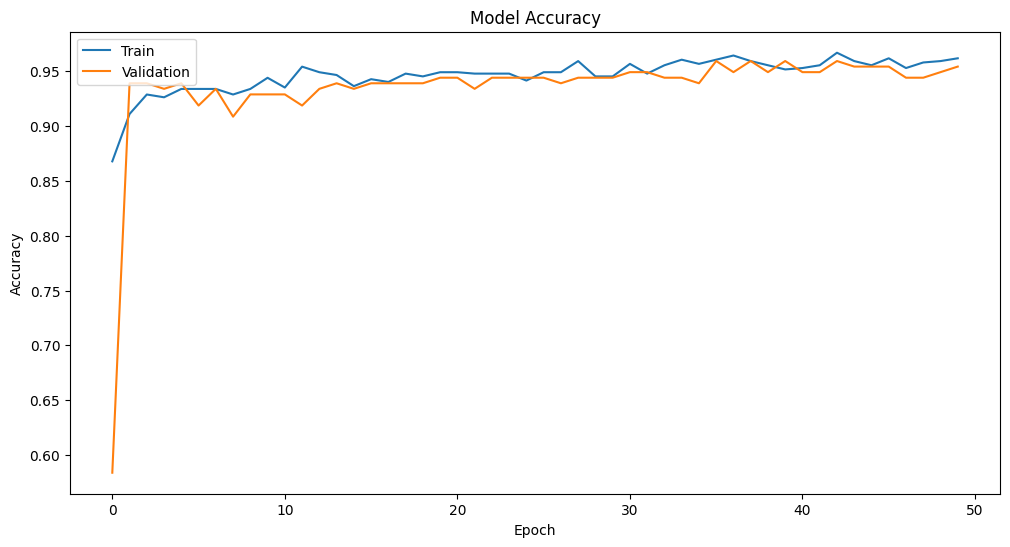

In [105]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.plot(adam_model.history['accuracy'])
plt.plot(adam_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

Stochastic Gradient Descent Optimization technique

In [106]:
model3 = Sequential()
# Add convolution 2D
model3.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

model3.add(Conv1D(filters=64,kernel_size=2,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Flatten())
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(1,activation='sigmoid'))


model3.compile(optimizer=SGD(0.9),loss='binary_crossentropy',metrics=['accuracy'])
model3.save('saved_models/model3.pkl')
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 29, 32)            96        
                                                                 
 batch_normalization_12 (Ba  (None, 29, 32)            128       
 tchNormalization)                                               
                                                                 
 dropout_18 (Dropout)        (None, 29, 32)            0         
                                                                 
 conv1d_13 (Conv1D)          (None, 28, 64)            4160      
                                                                 
 batch_normalization_13 (Ba  (None, 28, 64)            256       
 tchNormalization)                                               
                                                                 
 dropout_19 (Dropout)        (None, 28, 64)           

In [107]:
sgd_model = model3.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

Epoch 1/50
25/25 [==============================] - 2s 25ms/step - loss: nan - accuracy: 0.4930 - val_loss: nan - val_accuracy: 0.5025
Epoch 2/50
25/25 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.4994 - val_loss: nan - val_accuracy: 0.5025
Epoch 3/50
25/25 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.4994 - val_loss: nan - val_accuracy: 0.5025
Epoch 4/50
25/25 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.4994 - val_loss: nan - val_accuracy: 0.5025
Epoch 5/50
25/25 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.4994 - val_loss: nan - val_accuracy: 0.5025
Epoch 6/50
25/25 [==============================] - 0s 12ms/step - loss: nan - accuracy: 0.4994 - val_loss: nan - val_accuracy: 0.5025
Epoch 7/50
25/25 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.4994 - val_loss: nan - val_accuracy: 0.5025
Epoch 8/50
25/25 [==============================] - 0s 

In [108]:
_, train_accuracy = model3.evaluate(X_train, y_train)
test_loss, test_accuracy = model3.evaluate(X_test, y_test)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

7/7 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.5025
Training Accuracy: 49.94%
Test Accuracy: 50.25%


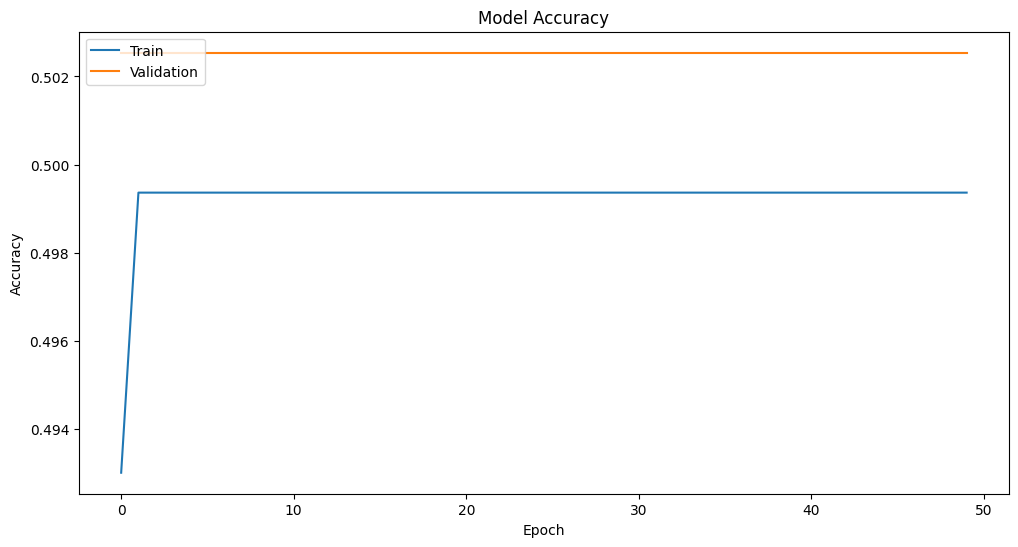

In [109]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.plot(sgd_model.history['accuracy'])
plt.plot(sgd_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

Root Mean Square Propagation

In [110]:
model4 = Sequential()
model4.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))

model4.add(Conv1D(filters=64,kernel_size=2,activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))

model4.add(Flatten())
model4.add(Dense(64,activation='relu'))
model4.add(Dropout(0.5))

model4.add(Dense(1,activation='sigmoid'))


model4.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['accuracy'])
model4.save('saved_models/model4.pkl')
model4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 29, 32)            96        
                                                                 
 batch_normalization_14 (Ba  (None, 29, 32)            128       
 tchNormalization)                                               
                                                                 
 dropout_21 (Dropout)        (None, 29, 32)            0         
                                                                 
 conv1d_15 (Conv1D)          (None, 28, 64)            4160      
                                                                 
 batch_normalization_15 (Ba  (None, 28, 64)            256       
 tchNormalization)                                               
                                                                 
 dropout_22 (Dropout)        (None, 28, 64)           

In [111]:
rms_model = model4.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

Epoch 1/50
25/25 [==============================] - 3s 37ms/step - loss: 0.3328 - accuracy: 0.8818 - val_loss: 0.3721 - val_accuracy: 0.8680
Epoch 2/50
25/25 [==============================] - 0s 16ms/step - loss: 0.2563 - accuracy: 0.9098 - val_loss: 0.2566 - val_accuracy: 0.9442
Epoch 3/50
25/25 [==============================] - 0s 11ms/step - loss: 0.2165 - accuracy: 0.9288 - val_loss: 0.3040 - val_accuracy: 0.8985
Epoch 4/50
25/25 [==============================] - 0s 10ms/step - loss: 0.2351 - accuracy: 0.9187 - val_loss: 0.1978 - val_accuracy: 0.9442
Epoch 5/50
25/25 [==============================] - 0s 11ms/step - loss: 0.1956 - accuracy: 0.9263 - val_loss: 0.2157 - val_accuracy: 0.9391
Epoch 6/50
25/25 [==============================] - 0s 11ms/step - loss: 0.2094 - accuracy: 0.9352 - val_loss: 0.1889 - val_accuracy: 0.9442
Epoch 7/50
25/25 [==============================] - 0s 11ms/step - loss: 0.1966 - accuracy: 0.9377 - val_loss: 0.1921 - val_accuracy: 0.9340
Epoch 8/50
25

In [112]:
_, train_accuracy = model4.evaluate(X_train, y_train)
test_loss, test_accuracy = model4.evaluate(X_test, y_test)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

7/7 [==============================] - 0s 6ms/step - loss: 0.1040 - accuracy: 0.9746
Training Accuracy: 98.60%
Test Accuracy: 97.46%


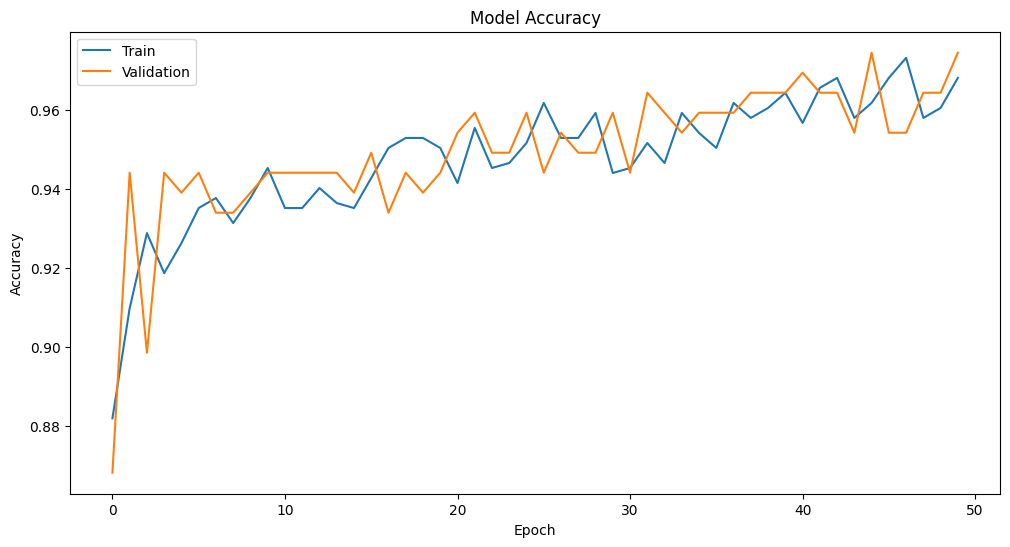

In [113]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.plot(rms_model.history['accuracy'])
plt.plot(rms_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

Error Analysis: Make Predictions using the best saved model

In [114]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy_score(y_test,y_pred)
def make_predictions(model_path, X_test, y_test):
    # Load the model
    model = load_model(model_path)
    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    accuracy_score(y_test,y_pred)
    # Make predictions
    predictions = model.predict(X_test)

    # Convert probabilities to binary labels (0 or 1)
    predictions_labels = np.round(predictions).flatten()

    # Convert y_test to binary labels (assuming it's 0 or 1)
    true_labels = y_test

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(true_labels, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    # Calculate classification report
    report = classification_report(true_labels, y_pred)
    print("Classification Report:\n", report)


7/7 [==============================] - 0s 10ms/step


Without Optimization

In [115]:
model_path = 'saved_models/model1.pkl'
make_predictions(model_path, X_test, y_test )

7/7 [==============================] - 0s 10ms/step
Confusion Matrix:
 [[99  0]
 [97  1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      1.00      0.67        99
           1       1.00      0.01      0.02        98

    accuracy                           0.51       197
   macro avg       0.75      0.51      0.35       197
weighted avg       0.75      0.51      0.35       197



With Adam Optimization

In [116]:
model_path = 'saved_models/model2.pkl'
make_predictions(model_path, X_test, y_test )

7/7 [==============================] - 0s 4ms/step
Confusion Matrix:
 [[ 0 99]
 [ 0 98]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        99
           1       0.50      1.00      0.66        98

    accuracy                           0.50       197
   macro avg       0.25      0.50      0.33       197
weighted avg       0.25      0.50      0.33       197



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



With SGD

In [117]:
model_path = 'saved_models/model3.pkl'
make_predictions(model_path, X_test, y_test )

7/7 [==============================] - 0s 6ms/step
Confusion Matrix:
 [[99  0]
 [98  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67        99
           1       0.00      0.00      0.00        98

    accuracy                           0.50       197
   macro avg       0.25      0.50      0.33       197
weighted avg       0.25      0.50      0.34       197



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



With RMSOp

In [118]:
model_path = 'saved_models/model4.pkl'
make_predictions(model_path, X_test, y_test )


7/7 [==============================] - 0s 6ms/step
Confusion Matrix:
 [[ 0 99]
 [ 0 98]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        99
           1       0.50      1.00      0.66        98

    accuracy                           0.50       197
   macro avg       0.25      0.50      0.33       197
weighted avg       0.25      0.50      0.33       197



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

